<a href="https://colab.research.google.com/github/apurba1914/Machine-Learning-Lab/blob/main/Build_Neural_Network_From_scratch_task_Lab_04_Roll_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml # Import fetch_openml instead of fetch_mldata

# Load the MNIST dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract the data and target labels
X, y = mnist["data"], mnist["target"]

In [ ]:
X = X / 255

In [ ]:
#for 2 class classification set label for "zero" to 1 and other digits to 0

import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [ ]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [ ]:
#shuffle the training set for good measure
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

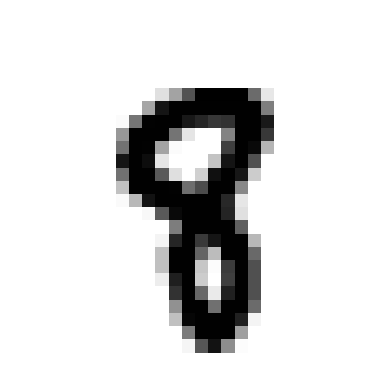

[0.]


In [ ]:

#Let’s have a look at a random image and label just to make sure we didn’t make any mistake

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [ ]:
#define the sigmoid function

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [ ]:
#define binary crossentropy cost function

def compute_loss(Y, Y_hat):

    m =  Y.shape[1]
    L = -(1 / m) * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))

    return L



In [ ]:
"""def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = np.mean(-(Y*np.log(Y_hat)+(1-Y)*np.log(1-Y_hat)))

    return L
Y=[0.1,0.22,0.33]
Y=np.array([Y])
Y_hat=[0.2,0.3,0.4]
Y_hat=np.array([Y_hat])
print(compute_loss(Y,Y_hat))
"""

'def compute_loss(Y, Y_hat):\n\n    m = Y.shape[1]\n    L = np.mean(-(Y*np.log(Y_hat)+(1-Y)*np.log(1-Y_hat)))\n\n    return L\nY=[0.1,0.22,0.33]\nY=np.array([Y])\nY_hat=[0.2,0.3,0.4]\nY_hat=np.array([Y_hat])\nprint(compute_loss(Y,Y_hat))\n'

In [ ]:
learning_rate = .1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)

    W = W - learning_rate * dW
    b = b - learning_rate * db


    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6678661598220238
Epoch 100 cost:  0.005264078835142466
Epoch 200 cost:  0.0028656734926140997
Epoch 300 cost:  0.002002508171183948
Epoch 400 cost:  0.0015514460635488703
Epoch 500 cost:  0.0012722377396089406
Epoch 600 cost:  0.0010815561841266586
Epoch 700 cost:  0.0009426523814024557
Epoch 800 cost:  0.0008367336974776137
Epoch 900 cost:  0.0007531641748175973
Epoch 1000 cost:  0.0006854605629713902
Epoch 1100 cost:  0.0006294399653825911
Epoch 1200 cost:  0.0005822795729631029
Epoch 1300 cost:  0.0005420036318064089
Epoch 1400 cost:  0.0005071868156853183
Epoch 1500 cost:  0.0004767743553490861
Epoch 1600 cost:  0.00044996853135566224
Epoch 1700 cost:  0.0004261545765280452
Epoch 1800 cost:  0.0004048508728825912
Epoch 1900 cost:  0.00038567461656774583
Final cost: 0.0003684830419788492


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.dot(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[10000]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(200):

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (1 - np.power(A1, 2))
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1)


    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  2.42791323601238
Epoch 100 cost:  7.832014666442542e-15
Final cost: 7.832014666442542e-15


In [ ]:
Z1 = np.dot(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[10000]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

X = X / 255

In [ ]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [ ]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [ ]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [ ]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))


X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)


    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (1 - np.power(A1, 2))
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)


    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1




    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  6.959902904661416
Epoch 100 cost:  0.5999580157707288
Epoch 200 cost:  0.4366499102453615
Epoch 300 cost:  0.4021514446158924
Epoch 400 cost:  0.3831174054734126
Epoch 500 cost:  0.36917090220732546
Epoch 600 cost:  0.35810435912665806
Epoch 700 cost:  0.34911809832448
Epoch 800 cost:  0.34136656915868124


<ipython-input-25-196c71070f63>:4: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


Epoch 900 cost:  0.3337342808091601
Epoch 1000 cost:  0.32687068403184205
Epoch 1100 cost:  0.3198159189648171
Epoch 1200 cost:  0.31224515561209154
Epoch 1300 cost:  0.3062165169608385
Epoch 1400 cost:  0.30096803059541993
Epoch 1500 cost:  0.29633907955025673
Epoch 1600 cost:  0.29267479795934137
Epoch 1700 cost:  0.29007652679010326
Epoch 1800 cost:  0.287597899661429
Epoch 1900 cost:  0.2856783545619058
Final cost: 0.2842022335077571


In [ ]:
Z1 = np.dot(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 941    0   18    6    6    8   14    2   10   10]
 [   1 1104   10    4    2    5    4   11    3    8]
 [   6    7  924   27    3    7    5   23   24    8]
 [   5   10   28  884    2   41    2   13   32   14]
 [   2    0    6    1  909    7   12    7    6   41]
 [   8    2    3   31    3  776   20    0   24   11]
 [   9    3   13    5    9   14  897    1   13    2]
 [   4    1    8   16    5    9    1  947    9   26]
 [   2    7   19   28    7   15    3    3  833   16]
 [   2    1    3    8   36   10    0   21   20  873]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1015
           1       0.97      0.96      0.97      1152
           2       0.90      0.89      0.89      1034
           3       0.88      0.86      0.87      1031
           4       0.93      0.92      0.92       991
           5       0.87      0.88      0.88       878
           6       0.94      0.93      0.93       966
           7       0.92      0.92   

<ipython-input-25-196c71070f63>:4: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))
